<span style='font-size: 40px;'> Lending Club - ML Modeling with LightGBM </span>



<span style='font-size: 15px;'> Lending Club is an online peer-to-peer lending platform that allows small-dollar investors to lend borrower small unsecured personal loans. The interest rate charged on the loan is done on the basis of the grades and subgrades formulated by Lending Club. The method of calculating these grades is not transparent and the purpose of this project is to try to determine which variables are most strongly correlated with a loan being paid off by the end of its term, through a combination of statistical and visual analysis, as well as attempting to train a machine learning model to match the results or surpass those found in the datset.  </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import textwrap
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,  classification_report
import lightgbm as lgb
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

<span style='font-size: 30px;'> Machine Learning Modeling</span>

I began the machine learning experimentation by running the scaled dataset through a logistic regression model. This is often the initial model to experiment with as it's the most basic of models. It assumes a linear relationship between the features and the y variable.

Random Forest is a common model that uses decision trees. Each tree is trained on a subset of the features and underlying data and the final prediction is based on a majority of the individual tree predictions. While it has many advantages like resilience to overfitting and handling of complex non-linear relationships, it was too heavy of a model, memory-wise and just the initial model for me took me too long for me to be able to tune and re-run variants as I will have to do.

What I wanted experiment with was the Light Gradient Booster Machine (LightGBM) model. Considered very effective for a variety of ML tasks, it like Random Forest utilizes decision trees. It trains the model sequentially and each model is meant to improve on the last, with a focus on correcting the wrong outputs of the prior models. LightGBM is incredibly robust for a model that has so few memory demands due to its use of bins to group the data. This is the model I ran with after initially testing all 3.

Below I create functions for all three ML models based on the scaled and split data from earlier.

In [68]:
def logistic_training():
    #Initialize Logistic Regression model
    logistic_model = LogisticRegression()

    # Fit the model on the training data
    logistic_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = logistic_model.predict(X_test)

    accuracy_lr = accuracy_score(y_test, y_pred)
    precision_lr = precision_score(y_test, y_pred)
    recall_lr = recall_score(y_test, y_pred)
    f1_lr = f1_score(y_test, y_pred)
    conf_matrix_lr = confusion_matrix(y_test, y_pred)

    print(f"Accuracy (Log Regression): {accuracy_lr}")
    print(f"Precision (Log Regression): {precision_lr}")
    print(f"Recall (Log Regression): {recall_lr}")
    print(f"F1-Score (Log Regression): {f1_lr}")
    print(f"Confusion Matrix (Log Regression):\n{conf_matrix_lr}")

In [39]:
def random_forest_training():
    # Initialize Random Forest model
    rf_model = RandomForestClassifier()

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred_rf = rf_model.predict(X_test)

    # Calculate metrics
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    
    # Confusion Matrix
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

    # Print metrics
    print(f"Accuracy (Random Forest): {accuracy_rf}")
    print(f"Precision (Random Forest): {precision_rf}")
    print(f"Recall (Random Forest): {recall_rf}")
    print(f"F1-Score (Random Forest): {f1_rf}")
    print(f"Confusion Matrix (Random Forest):\n{conf_matrix_rf}")

In [70]:
def lgb_model_training():
    # Initializing the LGB model
    initial_lgb = lgb.LGBMClassifier()

    # Training the model
    initial_lgb.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = initial_lgb.predict(X_test)

    # Evaluating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Displaying metrics
    print(f'23 Feature LGB Model Accuracy: {accuracy}')
    print(f'23 Feature LGB Model Precision: {precision}')
    print(f'23 Feature LGB Model Recall: {recall}')
    print(f'23 Feature LGB Model F1 score: {F1}')    
    print(f'23 Feature LGB Confusion Matrix:\n{conf_matrix}')

In [71]:
logistic_training()

C:\Users\97258\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Log Regression): 0.7991327204812495
Precision (Log Regression): 0.8046263327814165
Recall (Log Regression): 0.9873834996553688
F1-Score (Log Regression): 0.8866857201293913
Confusion Matrix (Log Regression):
[[  2775  40001]
 [  2105 164740]]


In [40]:
random_forest_training()

Accuracy (Random Forest): 0.79885126013138
Precision (Random Forest): 0.8064505028855702
Recall (Random Forest): 0.9832659054811352
F1-Score (Random Forest): 0.886123947054995
Confusion Matrix (Random Forest):
[[  3403  39373]
 [  2792 164053]]


In [72]:
lgb_model_training()

[LightGBM] [Info] Number of positive: 668326, number of negative: 170154
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.135998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2646
[LightGBM] [Info] Number of data points in the train set: 838480, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.797069 -> initscore=1.368072
[LightGBM] [Info] Start training from score 1.368072
23 Feature LGB Model Accuracy: 0.80095028646939
23 Feature LGB Model Precision: 0.8077831349011119
23 Feature LGB Model Recall: 0.9840870268812371
23 Feature LGB Model F1 score: 0.8872617230245471
23 Feature LGB Confusion Matrix:
[[  3706  39070]
 [  2655 164190]]


Of all the models, random forest had the longest run-time. At first sight, all three models looks great! On the first iteration, with no hyperparamater tuning, we have an ~80% accuracy and 98% recall! 

The unreasonably high recall is the first sign something is off. What seems like good metrics are simply due to an ubalanced dataset. They are too aggressive in choosing True labels and simply by guessing Fully Paid on almost every loan, which you can see in the confusion matrix. They're able to score an 80% accuracy rate almost by complete chance. To resolve this, we need to upsample the minority class so that the newly formed label has a 50/50 ratio of Trues and Falses

In [41]:
# Creating a new df with a newly upsampled minority class
upsampled_model = pd.concat([model_df[model_df['loan_status'] == 1], # Keep 1s as they are
                             model_df[model_df['loan_status'] == 0].sample(n=len(model_df[model_df['loan_status'] == 1]), replace=True, random_state=42)]) # Replace 0's with 1's])

# Checking the count in the new dataframe. They should be even.
print(upsampled_model['loan_status'].value_counts())

loan_status
1    835171
0    835171
Name: count, dtype: int64


Below we scale the train and test sets for the newly upsampled data. After experimenting with several models, the run time on the Random Forest prevents me from utilizing it for the remainder of this project. I continue my analysis with the LightGBM model.

In [42]:
# Selecting the features to be tested
X_ups= upsampled_model[selected_features]

# Scale the data to be values from 0 to 1
scaler = MinMaxScaler()
X_ups = scaler.fit_transform(X_ups)

# Setting the y to the value we want to predict, the final status of each loan.
y_ups = upsampled_model['loan_status']

X_ups_train, X_ups_test, y_ups_train, y_ups_test = train_test_split(X_ups, y_ups, test_size=0.2, random_state=42)

Just to see how the logistic regression model does, it seems to produce about a 65% accuracy on the upscaled data. This is an improvement, but still not much above chance. 

In [77]:
def upsample_logistic_training(): 
    #Initialize Logistic Regression model
    logistic_model = LogisticRegression()

    # Fit the model on the training data
    logistic_model.fit(X_ups_train, y_ups_train)

    # Predict on the test data
    y_ups_pred = logistic_model.predict(X_ups_test)

    ups_accuracy_lr = accuracy_score(y_ups_test, y_ups_pred)
    ups_precision_lr = precision_score(y_ups_test, y_ups_pred)
    ups_recall_lr = recall_score(y_ups_test, y_ups_pred)
    ups_f1_lr = f1_score(y_ups_test, y_ups_pred)
    ups_conf_matrix_lr = confusion_matrix(y_ups_test, y_ups_pred)

    print(f"Accuracy (Upsampled Log Regression): {ups_accuracy_lr}")
    print(f"Precision (Upsampled Log Regression): {ups_precision_lr}")
    print(f"Recall (Upsampled Log Regression): {ups_recall_lr}")
    print(f"F1-Score (Upsampled Log Regression): {ups_f1_lr}")
    print(f"Confusion Matrix (Upsampled Log Regression):\n{ups_conf_matrix_lr}")

In [78]:
upsample_logistic_training()

C:\Users\97258\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Upsampled Log Regression): 0.645779764060718
Precision (Upsampled Log Regression): 0.6432943299672894
Recall (Upsampled Log Regression): 0.6503910352982132
F1-Score (Upsampled Log Regression): 0.6468232176113843
Confusion Matrix (Upsampled Log Regression):
[[107374  60086]
 [ 58248 108361]]


The LightGBM model has a slightly higher accuracy but only marginally.

In [51]:
def upsample_lgb_training():
    ups_lgb = lgb.LGBMClassifier()

    # Training the model
    ups_lgb.fit(X_ups_train, y_ups_train)

    # Making predictions on the test set
    y_ups_pred =  ups_lgb.predict(X_ups_test)

    ups_accuracy_lgb = accuracy_score(y_ups_test, y_ups_pred)
    ups_precision_lgb = precision_score(y_ups_test, y_ups_pred)
    ups_recall_lgb = recall_score(y_ups_test, y_ups_pred)
    ups_f1_lgb = f1_score(y_ups_test, y_ups_pred)
    ups_conf_matrix_lgb = confusion_matrix(y_ups_test, y_ups_pred)

    print(f"Accuracy (Upsampled LGB): {ups_accuracy_lgb}")
    print(f"Precision (Upsampled LGB): {ups_precision_lgb}")
    print(f"Recall (Upsampled LGB): {ups_recall_lgb}")
    print(f"F1-Score (Upsampled LGB): {ups_f1_lgb}")
    print(f"Confusion Matrix (Upsampled LGB):\n{ups_conf_matrix_lgb}")

In [80]:
upsample_lgb_training()

[LightGBM] [Info] Number of positive: 668562, number of negative: 667711
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2653
[LightGBM] [Info] Number of data points in the train set: 1336273, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500318 -> initscore=0.001274
[LightGBM] [Info] Start training from score 0.001274
Accuracy (Upsampled LGB): 0.6577054440849046
Precision (Upsampled LGB): 0.6605370999551495
Recall (Upsampled LGB): 0.6452892700874503
F1-Score (Upsampled LGB): 0.6528241623453117
Confusion Matrix (Upsampled LGB):
[[112208  55252]
 [ 59098 107511]]


Below I create a function to run the LGBM model with specified features I want included, n_estimators, num_leaves, and feature fraction. I will talk more on these paramaters later. In the meantime, what's important is that I run continuous iterations with each iteration displaying the feature importances. These help me narrow down the features I want to keep in the model. As the n_estimators increase and I further finetune the model, the presence of so many features will cause longer run-times, as well as risking overfitting. Therefore, I drop the less important features until I finally narrow them down to 9.

In [35]:
def tuned_upsample_lgb_training(features, n_estimators, num_leaves, fraction):
    X_ups= upsampled_model[features]

    # Scale the data to be values from 0 to 1
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_ups)

    # Setting the y to the value we want to predict, the final status of each loan.
    y_ups = upsampled_model['loan_status']

    X_ups_train, X_ups_test, y_ups_train, y_ups_test = train_test_split(X_scaled, y_ups, test_size=0.2, random_state=42)

    lgb_params = {
    'n_estimators': n_estimators,  
    #'max_depth': -1,  
    'objective': 'binary',
    'learning_rate' : 0.1,  
    'num_leaves' : num_leaves,  
    'feature_fraction': fraction,  
    #'bagging_fraction': fraction,  
    # 'bagging_freq': 1,
    #  'reg_alpha': 0.0,
    # 'reg_lambda': 0.0,
     'boosting_type' : 'gbdt'
    }

    tuned_lgb = lgb.LGBMClassifier(**lgb_params, verbose=0, force_col_wise=True)

    tuned_lgb.fit(X_ups_train, y_ups_train)


    # Making predictions on the test set
    y_ups_pred =  tuned_lgb.predict(X_ups_test)

    ups_accuracy_lgb = accuracy_score(y_ups_test, y_ups_pred)
    ups_precision_lgb = precision_score(y_ups_test, y_ups_pred)
    ups_recall_lgb = recall_score(y_ups_test, y_ups_pred)
    ups_f1_lgb = f1_score(y_ups_test, y_ups_pred)
    ups_conf_matrix_lgb = confusion_matrix(y_ups_test, y_ups_pred)

     # Feature importance
    feature_importances = pd.DataFrame({'Feature': X_ups.columns, 'Importance': tuned_lgb.feature_importances_})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Display metrics
    print(f"{len(features)} Features Accuracy (Upsampled LGB): {ups_accuracy_lgb}")
    print(f"{len(features)} Features Precision (Upsampled LGB): {ups_precision_lgb}")
    print(f"{len(features)} Features Recall (Upsampled LGB): {ups_recall_lgb}")
    print(f"{len(features)} Features F1-Score (Upsampled LGB): {ups_f1_lgb}")
    print(f"{len(features)} Features Confusion Matrix (Upsampled LGB):\n{ups_conf_matrix_lgb}")

    # Display feature importances
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importances - Upsampled LGB Model')
    plt.show()

    return feature_importances, X_ups_train, X_ups_test, y_ups_train, y_ups_test

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
24 Features Accuracy (Upsampled LGB): 0.6909800071242768
24 Features Precision (Upsampled LGB): 0.6970333845283324
24 Features Recall (Upsampled LGB): 0.672826798072133
24 Features F1-Score (Upsampled LGB): 0.6847162158860465
24 Features Confusion Matrix (Upsampled LGB):
[[118736  48724]
 [ 54510 112099]]


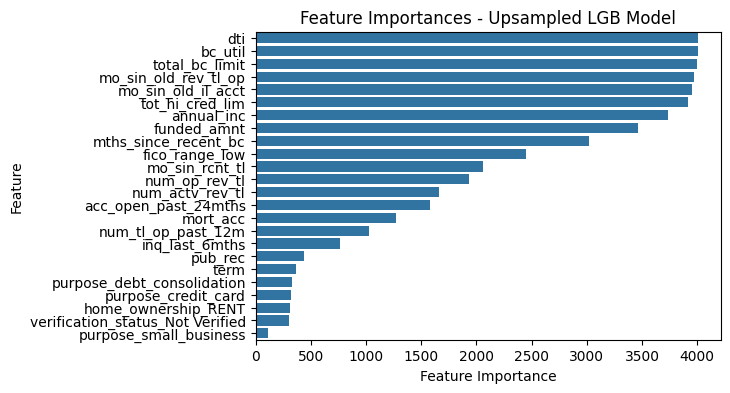

In [33]:
importances_24, X_train_24, X_test_24, y_train_24, y_test_24 = tuned_upsample_lgb_training(features=selected_features, n_estimators=1000, num_leaves=50, fraction=.8)

We narrow down the features, initially from 24 to 17, then 17 to 10, then 10 to our final feature set of 9. In each run, I checked to see that the prior dropping didn't significantly impact the scoring metrics. 

In [59]:
top_17_lgb_features = importances_24.loc[importances_24['Importance']>700,'Feature'].to_list()

In [ ]:
importances_17, X_train_17, X_test_17, y_train_17, y_test_17  = tuned_upsample_lgb_training(features=top_17_lgb_features,n_estimators=1000, num_leaves=50, fraction=.8)

In [ ]:
top_10_lgb_features = importances_17.loc[importances_17['Importance']>2200,'Feature'].to_list()
importances_10, X_train_10, X_test_10, y_train_10, y_test_10 = tuned_upsample_lgb_training(features=top_10_lgb_features,n_estimators=1000, num_leaves=50, fraction=.8)


The final 9 columns may be somewhat surprising. Based on intuition, FICO not making the list is surprising, though annual income did move up in importance from where it was based on our simple Spearman correlation analysis, matching common intuition. BC_util is the total revolving bank card credit limit utilized. Total_bc_limit represents the total bank card credit limit to begin with. (These were not correlated above even 0.50 to each other in our multicollinearity analysis). The months since the oldest bank installment account opened and months since the oldest revolving account opened for some reason also are very significant in the model. I would guess it has to do either as an indirect proxy for age or a sign of financial experience and sophistication. Still, I would have expected something like pub_rec, the number of derogatory public records, to feature more prominently. Nonetheless, a ML model captures complex relationships not meant to be intuitive or even understandable to the human user.

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
9 Features Accuracy (Upsampled LGB): 0.6573163029194568
9 Features Precision (Upsampled LGB): 0.6632244731815762
9 Features Recall (Upsampled LGB): 0.6356619390309047
9 Features F1-Score (Upsampled LGB): 0.6491507658737212
9 Features Confusion Matrix (Upsampled LGB):
[[113682  53778]
 [ 60702 105907]]


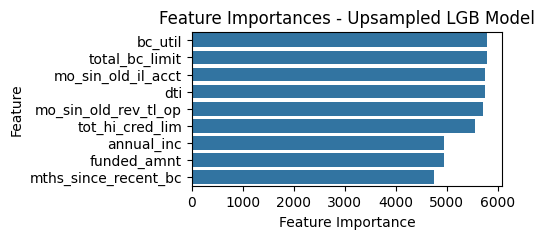

In [36]:
top_9_lgb_features = importances_10[:-1]
importances_10, X_train_10, X_test_10, y_train_10, y_test_10  = tuned_upsample_lgb_training(features=top_9_lgb_features,n_estimators=1000, num_leaves=50, fraction=.8)

<span style='font-size:20px'> Primary paramaters of LGBM model.</span>

The parameters I initially experiment with are n_estimators and num_leaves. N_estimators are simply the number of decision tree rounds that take place. The more rounds, the more accurate the model will be generally, though the greater risk of overfitting. Number of leaves are the maximum amount of leaf nodes a decision tree can have. This increases the complexity of the relationships explored in the model. Setting this value quite high improves my model without the same memory constraints as the brute force approach of increasing n_params. There's room to increase num_leaves higher but I want to keep the running speed of my script to a manageable levelfor my later analysis.

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Number of positive: 668562, number of negative: 667711
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1336273, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500318 -> initscore=0.001274
[LightGBM] [Info] Start training from score 0.001274
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
9 Features Accuracy (Upsampled LGB): 0.8207136848974314
9 Features Precision (Upsampled LGB): 0.8509784574905443
9 Features Recall (Upsampled LGB

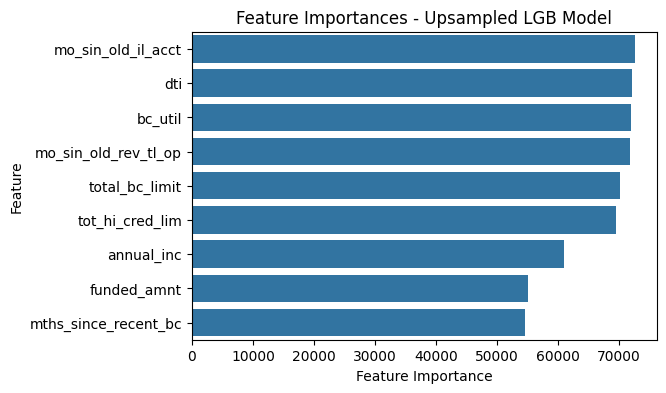

In [62]:
feature_importances_9, X_train_9, X_test_9 , y_train_9 , y_test_9   = tuned_upsample_lgb_training(top_9_lgb_features, 1000, 600, 1)

<span style='font-size:30px'>Hyperparameter tuning and Cross-validation</span>

I utilize Scikit-learn's Randomized Search Cross Validation as grid searches are too memory-intensive. This randomly selects combinations of parameters that I give lists of options to choose from. It then cross validates each by splitting them into subsamples (folds), five in our case, and meaning the accuracy of each. Cross validation helps identify how generalizable the model is, in other words, checks for overfitting.

After settling on n_estimators and num_leaves that balance performance and time, giving us an accuracy of 82%, just above the 80% repayment rate in the data set, I experiment with several other important parameters. In my previous runs, the learning rate was set at 0.10. This means that every boosting round adjusts its parameters by 10% "of the gradient of the loss function with respect to those parameters." In simple terms, it controls how strongly each boosting round responds to the errors identified in the last. Setting this value too low can cause the model to not be responsive enough each round. Alternatively, a learning rate set too high can cause the model to overfit to the errors of each round. I experiment on my random search cross validation with a lower learning rate and observe the results, as well as max_depth, bagging fractions, bagging frequency, and min_child samples.

Max depth (default: -1 or unlimited): Like num_leaves, max depth helps control for the complexity of the relationships observed. However, it controls the max depth of each decision tree (how many question splits there are), not how many terminal leaves there are.
Bagging (default fraction: 1): Bagging refers to the subsampling of data that occurs each round. This helps add randomness to the model and avoid overfitting. However, setting the fraction too low will cause higher variance, especially if couples with a low bagging frequency, which controls how often bagging occurs. After several experimentations with bagging criteria, I selected 0.65 and 0.80 for bagging fractions as the options in my model. This range seemed to optimize results. Because I have such a large dataset, I am not worried of unrepresentative samples each round. 
Min_child samples (default: 20): The minimum number of samples needed to create a leaf. Setting this too low risks overfitting, setting it too high causes patterns to be missed.

In [30]:
top_9_lgb_features = ['dti',
 'bc_util',
 'total_bc_limit',
 'mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'tot_hi_cred_lim',
 'annual_inc',
 'funded_amnt',
 'mths_since_recent_bc']

In [51]:
X_tuning, y_tuning = upsampled_model[top_9_lgb_features], upsampled_model['loan_status']

# Paramater choices using randomized search cross validation.
param_dist = {
    'n_estimators': [1000],
    'num_leaves': [600],
    'learning_rate': [0.01, 0.1],
    #'feature_fraction': [0.9, 1.0],
    'bagging_fraction': [0.65, 0.8],
    'min_child_samples': [20, 50],
    'bagging_freq': [1,5],
    'max_depth': [-1, 20],
    #'lambda_l1': [0, 0.1],
    'objective': ['binary'],  # Note: 'binary' should be inside a list
    'boosting_type': ['gbdt'],  # Note: 'gbdt' should be inside a list
}

# Instantiate LGBM model
lgbm_model = lgb.LGBMClassifier(force_col_wise=True)

# Instantiate randomized search cv
lgbm_cv = RandomizedSearchCV(lgbm_model, param_dist, cv=5, verbose=2)
lgbm_cv.fit(X_tuning, y_tuning)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 668136, number of negative: 668137
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1336273, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000001
[LightGBM] [Info] Start training from score -0.000001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(force_col_wise=True),
                   param_distributions={'bagging_fraction': [0.65, 0.8],
                                        'bagging_freq': [1, 5],
                                        'boosting_type': ['gbdt'],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [-1, 20],
                                        'min_child_samples': [20, 50],
                                        'n_estimators': [1000],
                                        'num_leaves': [600],
                                        'objective': ['binary']},
                   verbose=2)

The best combination cross-validated is shown below. The default min_child_samples and max_depth remain in place. A bagging fraction of 0.80 is chosen with a bagging frequency of 1. 

In [52]:
print("Tuned LightGBM Parameters: {}".format(lgbm_cv.best_params_))
print("Best score is {}".format(lgbm_cv.best_score_))

Tuned LightGBM Parameters: {'objective': 'binary', 'num_leaves': 600, 'n_estimators': 1000, 'min_child_samples': 20, 'max_depth': -1, 'learning_rate': 0.1, 'boosting_type': 'gbdt', 'bagging_freq': 1, 'bagging_fraction': 0.8}
Best score is 0.8479856245799591


After examining the complete results, I notice that the learning rate has a huge impact on performance. 0.1 learning rates perform better in every combination than 0.01 learning rates. This prompts me to experiment with higher learning rates.

In [53]:
# Access the complete results
cv_results = lgbm_cv.cv_results_

# Extract relevant information
param_keys = [key for key in cv_results.keys() if key.startswith('param_')]
params_and_scores = {key: cv_results[key] for key in param_keys + ['mean_test_score', 'std_test_score']}

# Convert to DataFrame for better visualization
cv_results = pd.DataFrame(params_and_scores)

pd.set_options('max')
# Display the DataFrame
cv_results


  param_objective param_num_leaves param_n_estimators param_min_child_samples  \
0          binary              600               1000                      50   
1          binary              600               1000                      20   
2          binary              600               1000                      20   
3          binary              600               1000                      50   
4          binary              600               1000                      20   
5          binary              600               1000                      20   
6          binary              600               1000                      20   
7          binary              600               1000                      20   
8          binary              600               1000                      50   
9          binary              600               1000                      50   

  param_max_depth param_learning_rate param_boosting_type param_bagging_freq  \
0              20           

I create a function below that allows me to run iterations of the model with varying parameters in one feature of my choice in each round. I experiment with learning rates higher than 0.1.

In [ ]:
def further_tuning_lgbm(num_leaves=600, n_estimators=1000,  learning_rate=0.1, bagging_freq=1, bagging_fraction=0.8, feature_fraction=1):    
    lgb_params =  {'boosting_type': 'gbdt', 'objective': 'binary', 'num_leaves': num_leaves, 'n_estimators': n_estimators, 'learning_rate': learning_rate,  'bagging_freq': bagging_freq, 'bagging_fraction': bagging_fraction, 'feature_fraction':feature_fraction}
    
    # Initializing the model
    tuned_lgb = lgb.LGBMClassifier(**lgb_params, verbose=0, n_jobs=1)

    tuned_lgb.fit(X_ups_train, y_ups_train)

    # Making predictions on the test set
    y_ups_pred =  tuned_lgb.predict(X_ups_test)

    ups_accuracy_lgb = accuracy_score(y_ups_test, y_ups_pred)
    ups_precision_lgb = precision_score(y_ups_test, y_ups_pred)
    ups_recall_lgb = recall_score(y_ups_test, y_ups_pred)
    ups_f1_lgb = f1_score(y_ups_test, y_ups_pred)

    # Display metrics
    print(f"The performance metrics for Learning Rate {learning_rate} are:")
    print(f"{learning_rate} Learning Rate Accuracy (Upsampled LGB): {ups_accuracy_lgb}")
    print(f"{learning_rate} Learning Rate Precision (Upsampled LGB): {ups_precision_lgb}")
    print(f"{learning_rate} Learning Rate Recall (Upsampled LGB): {ups_recall_lgb}")
    print(f"{learning_rate} Learning Rate F1-Score (Upsampled LGB): {ups_f1_lgb}/n")

In [40]:
for i, learning_rate in enumerate(np.arange(0.2, 0.6, 0.2)):
    further_tuning_lgbm(learning_rate) 

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
The performance metrics for Learning Rate 0.2 are:
0.2 Learning Rate Accuracy (Upsampled LGB): 0.9063127677216384
0.2 Learning Rate Precision (Upsampled LGB): 0.9457207043988695
0.2 Learning Rate Recall (Upsampled LGB): 0.8615981129470797
0.2 Learning Rate F1-Score (Upsampled LGB): 0.9017016438545469/n
[LightGBM] [Warning] 

After several experimentations, I find a learning rate of 0.5 to be optimal.

In [41]:
further_tuning_lgbm(learning_rate=0.5)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
The performance metrics for Learning Rate 0.5 are:
0.5 Learning Rate Accuracy (Upsampled LGB): 0.9225998221924213
0.5 Learning Rate Precision (Upsampled LGB): 0.9650437448788095
0.5 Learning Rate Recall (Upsampled LGB): 0.8765552881296929
0.5 Learning Rate F1-Score (Upsampled LGB): 0.9186735903831214/n


I run a randomized search once again, adding options for lambda_l1 and lambda_l2 are regularization techniques that help prevent overfitting by overfocus on any one feature. I didn't anticipate a major impact because my features are quite limited (only 9) and these paramaters are more useful for wider datasets.

In [100]:
X_tuning, y_tuning = upsampled_model[top_9_lgb_features], upsampled_model['loan_status']

param_dist = {
    'n_estimators': [1000],
    'num_leaves': [600],
    'learning_rate': [0.1, 0.5],
    #'feature_fraction': [0.9, 1.0],
    'bagging_fraction': [0.8],
    #'min_child_samples': [20],
    'bagging_freq': [1],
    'lambda_l1': [0.0,0.01],
    'lambda_l2': [0.0,0.01],
    #'max_depth': [-1], This is the default
    'objective': ['binary'],  # Note: 'binary' should be inside a list
    #'boosting_type': ['gbdt'],  # Note: 'gbdt' should be inside a list
}

lgbm_model = lgb.LGBMClassifier(force_col_wise=True)
  # Instantiate LGBMClassifier instead of DecisionTreeClassifier
lgbm_cv = RandomizedSearchCV(lgbm_model, param_dist, cv=5, verbose=2)
lgbm_cv.fit(X_tuning, y_tuning)

C:\Users\97258\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 668136, number of negative: 668137
[Li

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(force_col_wise=True),
                   param_distributions={'bagging_fraction': [0.8],
                                        'bagging_freq': [1],
                                        'lambda_l1': [0.0, 0.01],
                                        'lambda_l2': [0.0, 0.01],
                                        'learning_rate': [0.5],
                                        'n_estimators': [1000],
                                        'num_leaves': [600],
                                        'objective': ['binary']},
                   verbose=2)

In [106]:
print("Tuned LightGBM Parameters: \n{}".format(lgbm_cv.best_params_))
print("Best score is: \n{}".format(lgbm_cv.best_score_))

Tuned LightGBM Parameters: 
{'objective': 'binary', 'num_leaves': 600, 'n_estimators': 1000, 'learning_rate': 0.5, 'lambda_l2': 0.0, 'lambda_l1': 0.01, 'bagging_freq': 1, 'bagging_fraction': 0.8}
Best score is: 
0.9119210344900347


<span style='font-size:25px'>The final model!</span>

With a 91.38% accuracy and 96% precision, I'm quite happy with the results. Unlike earlier, on our very first run on the unbalance dataset when the recall was above 98%, a high precision rate implies a conservative approach to guessing positives. This is what we need in a loan lending preduction model where defaulted-on loans are very costly. What's more, the model is relatively memory-conscious and runs in just a few minutes on my local server. We reached a high accuracy without the reliance on brute strength (maximization of the n_estimators).

[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda

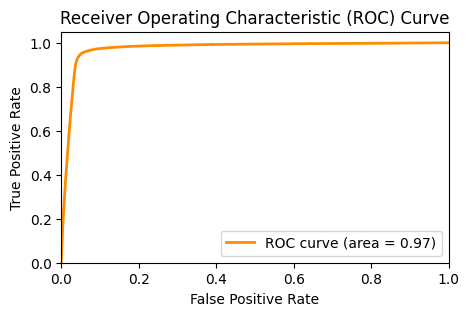

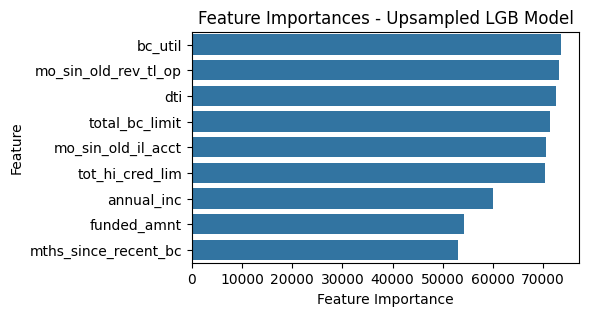

In [110]:
final_lgbm_params = {'objective': 'binary', 'num_leaves': 600, 'n_estimators': 1000, 'learning_rate': 0.5, 'lambda_l2': 0.0, 'lambda_l1': 0.01, 'bagging_freq': 1, 'bagging_fraction': 0.8}

tuned_lgb = lgb.LGBMClassifier(**final_lgbm_params, verbose=0, force_col_wise=True)

tuned_lgb.fit(X_ups_train, y_ups_train)

# Making predictions on the test set
y_ups_pred =  tuned_lgb.predict(X_ups_test)

ups_accuracy_lgb = accuracy_score(y_ups_test, y_ups_pred)
ups_precision_lgb = precision_score(y_ups_test, y_ups_pred)
ups_recall_lgb = recall_score(y_ups_test, y_ups_pred)
ups_f1_lgb = f1_score(y_ups_test, y_ups_pred)
ups_conf_matrix_lgb = confusion_matrix(y_ups_test, y_ups_pred)

# Calculation for ROC curve
y_ups_pred_proba = tuned_lgb.predict_proba(X_ups_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_ups_test, y_ups_pred_proba)
roc_auc = auc(fpr, tpr)

    # Feature importance
feature_importances = pd.DataFrame({'Feature': X_ups.columns, 'Importance': tuned_lgb.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)



<span style='font-size: 30px;'> Risks</span>




Despite the cross validation results, there’s a risk that my model was overfitted and while it did well on the sample set, there may be unknown characteristics of this dataset that future datasets won’t have. Perhaps the user base of LC during the period the data covers had particular characteristics that future users will not. 

More crucially, I noticed that there isn’t so strong of a relationship between the Spearman coefficients originally calculated and the feature importances. The process in which I narrowed down the dataframe columns and then chose the highest correlations for my model inevitably involved judgment calls. There may have been features correlated in a way that the Spearman coefficient didn't recognize. For a truly robust model, I would need to iterate through more than just my top 24 chosen variables. There can be lots of variables in the dataset that had complex non-linear and non-monotonic relationships with the target. 

What's more, due to memory-constraints, our randomized search cross validations in all likelihood didn't achieve the optimal results. We would need to run grid searches with more options for more features. 